### Imports

In [73]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

### Data Analysis & Cleaning

In [74]:
mpg_df = pd.read_csv('auto_MPG.csv', index_col=False)

mpg_df['car_brand'] = mpg_df['car_name'].replace(r'^(.*?)\s.*$', r'\1', regex=True)
mpg_df['car_brand'].value_counts()

car_brand
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
renault           5
saab              4
subaru            4
opel              4
chevy             3
cadillac          2
bmw               2
mercedes-benz     2
maxda             2
hi                1
toyouta           1
chevroelt         1
capri             1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: count, dtype: int64

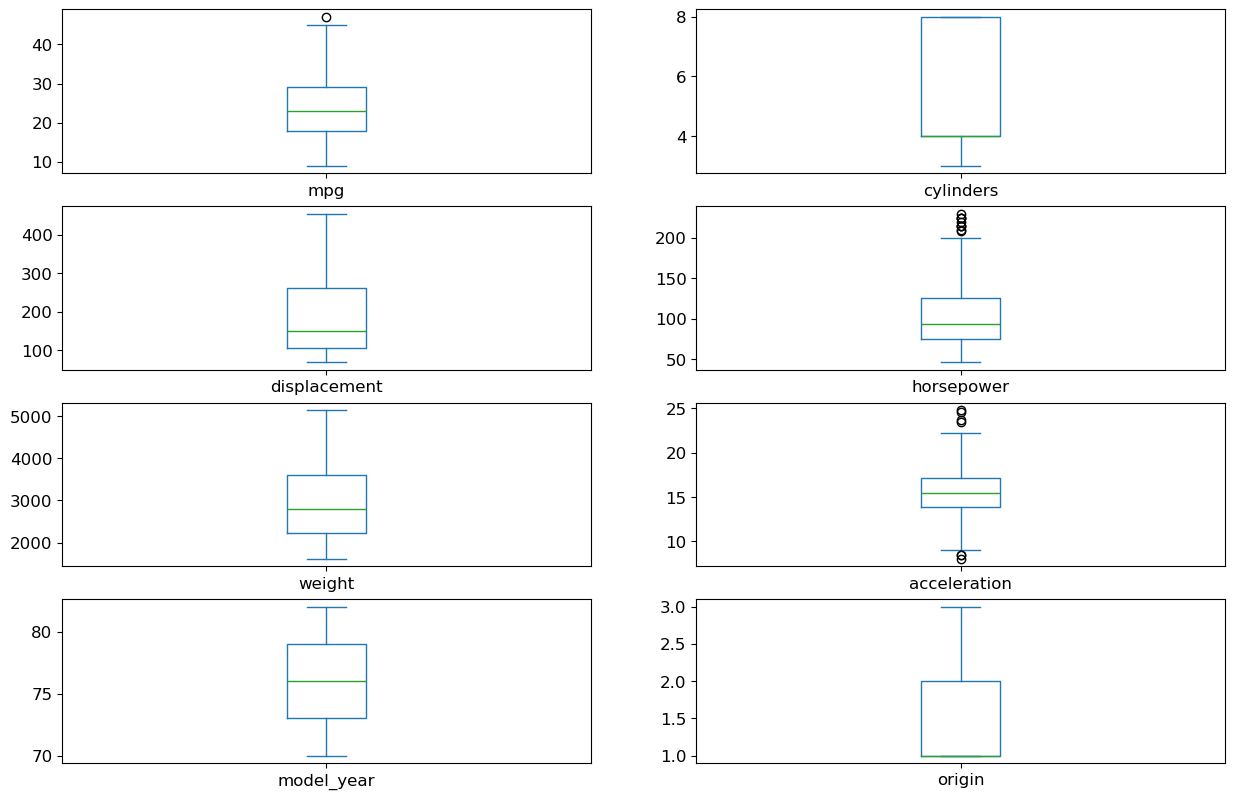

In [75]:
data_mean = mpg_df.iloc[:, :] 
data_mean.plot(kind='box', subplots=True, layout=(8,2), sharex=False, 
sharey=False, fontsize=12, figsize=(15,20));

5.454773869346734


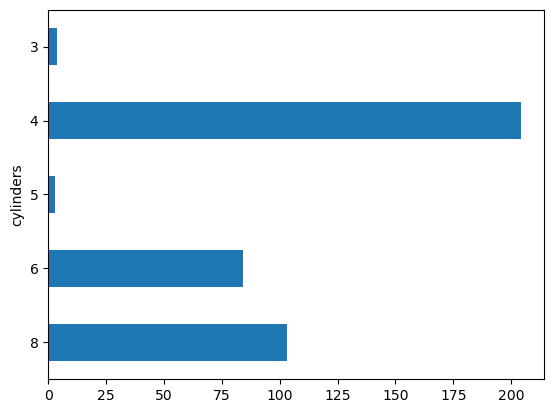

In [76]:
mpg_df['cylinders'].value_counts().sort_index(ascending=False).plot(kind='barh', )
print(np.mean(mpg_df['cylinders']) )
plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
2,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
3,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
4,17,8,302,140.0,3449,10.5,70,1,ford torino


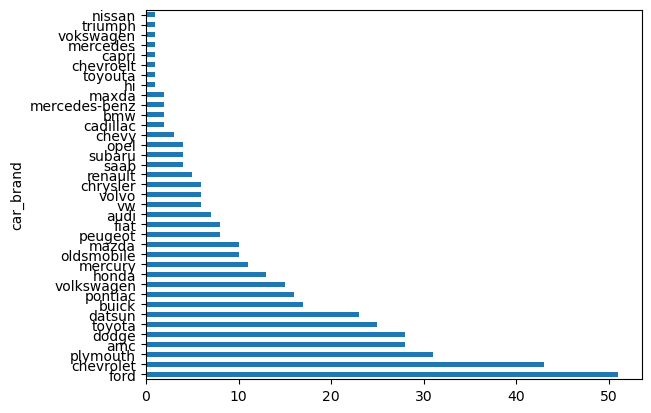

In [77]:
# Bar chart for brand name 
mpg_df['car_brand'].value_counts().plot(kind='barh')
# Decision: not use brand name
mpg_df.drop('car_brand', axis=1, inplace=True)
mpg_df.head()

In [78]:
#  DOUBLE CHECKING ACCELERATION OUTLIERS

acc_q3 = mpg_df['acceleration'].quantile(0.75)
acc_q1 = mpg_df['acceleration'].quantile(0.25)
acc_IQR = acc_q3 - acc_q1 

acc_lower = acc_q1 - acc_IQR*1.5
acc_higher = acc_q3 + acc_IQR*1.5
print(acc_lower, acc_higher)

acc_outlier = mpg_df[ ( mpg_df['acceleration'] < acc_lower ) | ( mpg_df['acceleration'] > acc_higher ) ]
# Sense check 
acc_outlier

8.8 22.2


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
7,14,8,440,215.0,4312,8.5,70,1,plymouth fury iii
9,15,8,390,190.0,3850,8.5,70,1,amc ambassador dpl
11,14,8,340,160.0,3609,8.0,70,1,plymouth 'cuda 340
59,23,4,97,54.0,2254,23.5,72,2,volkswagen type 3
299,27,4,141,71.0,3190,24.8,79,2,peugeot 504
326,43,4,90,48.0,2335,23.7,80,2,vw dasher (diesel)
394,44,4,97,52.0,2130,24.6,82,2,vw pickup


In [79]:
#  DOUBLE CHECKING HORSEPOWER OUTLIERS

hp_q3 = mpg_df['horsepower'].quantile(0.75)
hp_q1 = mpg_df['horsepower'].quantile(0.25)
hp_IQR = hp_q3 - hp_q1 

hp_lower = hp_q1 - hp_IQR*1.5
hp_higher = hp_q3 + hp_IQR*1.5
print(hp_lower, hp_higher)

hp_outlier = mpg_df[ ( mpg_df['horsepower'] < hp_lower ) | ( mpg_df['horsepower'] > hp_higher ) ]
hp_outlier
# Sense check 

-1.5 202.5


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
6,14,8,454,220.0,4354,9.0,70,1,chevrolet impala
7,14,8,440,215.0,4312,8.5,70,1,plymouth fury iii
8,14,8,455,225.0,4425,10.0,70,1,pontiac catalina
13,14,8,455,225.0,3086,10.0,70,1,buick estate wagon (sw)
25,10,8,360,215.0,4615,14.0,70,1,ford f250
27,11,8,318,210.0,4382,13.5,70,1,dodge d200
67,11,8,429,208.0,4633,11.0,72,1,mercury marquis
94,13,8,440,215.0,4735,11.0,73,1,chrysler new yorker brougham
95,12,8,455,225.0,4951,11.0,73,1,buick electra 225 custom
116,16,8,400,230.0,4278,9.5,73,1,pontiac grand prix


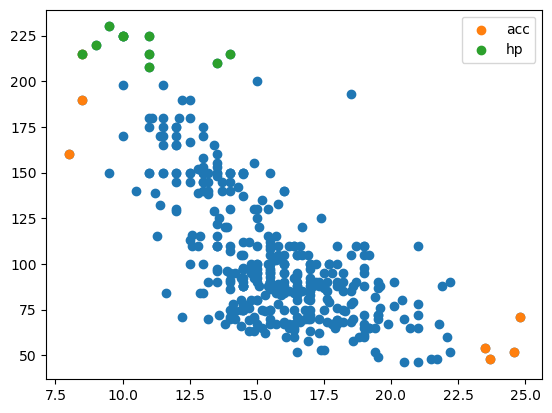

In [80]:
plt.scatter(x=mpg_df['acceleration'], y=mpg_df['horsepower'])
plt.scatter(x=acc_outlier['acceleration'], y=acc_outlier['horsepower'], label = 'acc')
plt.scatter(x=hp_outlier['acceleration'],y=hp_outlier['horsepower'], label = 'hp' )
plt.legend()

# Decision = keep outliers

In [81]:
mpg_df_new = mpg_df.drop('car_name', axis=1, inplace=False)
mpg_df_new = mpg_df_new.drop('origin', axis=1, inplace=False)
mpg_df_new.head()
mpg_df_new.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,61.116818,-10.303988,-655.158665,-233.464481,-5506.169956,8.986331,16.745415
cylinders,-10.303988,2.893415,168.621381,55.348244,1290.695575,-2.370842,-2.193499
displacement,-655.158665,168.621381,10871.958153,3614.002453,82367.359733,-156.331172,-142.722188
horsepower,-233.464481,55.348244,3614.002453,1481.569393,28265.620231,-73.186967,-59.036432
weight,-5506.169956,1290.695575,82367.359733,28265.620231,717140.990526,-974.899011,-959.946344
acceleration,8.986331,-2.370842,-156.331172,-73.186967,-974.899011,7.604848,2.938105
model_year,16.745415,-2.193499,-142.722188,-59.036432,-959.946344,2.938105,13.672443


In [82]:
# Impute missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

mpg_df_impute = pd.DataFrame(imputer.fit_transform(mpg_df_new))
mpg_df_impute.columns = imputer.get_feature_names_out()
mpg_df_impute.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0


In [83]:
# Normalising

mpg_df_wo_mpg = mpg_df_impute.drop('mpg', axis=1, inplace=False)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
mpg_df_norm = pd.DataFrame( scaler.fit_transform(mpg_df_wo_mpg) )
mpg_df_norm.columns = scaler.get_feature_names_out()
mpg_df_norm.head()


,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503519,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196233,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042590,0.935072,0.565841,-1.840117,-1.627426


In [84]:
# Apply Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=3, step=1)
mpg_df_norm_rfe = rfe.fit_transform(mpg_df_norm, mpg_df['mpg'])
mpg_df_final = pd.DataFrame(mpg_df_norm_rfe)
mpg_df_final.columns = rfe.get_feature_names_out()
mpg_df_final.head()

,displacement,horsepower,weight
0,1.090604,0.673118,0.630870
1,1.503519,1.589958,0.854333
2,1.196233,1.197027,0.550470
3,1.061796,1.197027,0.546923
4,1.042590,0.935072,0.565841


### Cleaning Functions

In [85]:
def get_mpg_df():
    """Get MPG data frame without car_name and origin features"""
    mpg_df = pd.read_csv('auto_MPG.csv', index_col=False)
    mpg_df.drop('car_name', axis=1, inplace=True)
    mpg_df.drop('origin', axis=1, inplace=True)

    imputer = SimpleImputer(strategy="median")
    out = pd.DataFrame(imputer.fit_transform(mpg_df))
    out.columns = imputer.get_feature_names_out()
    return out

def get_mpg_features():
    """Get MPG features without car_name and origin features"""
    return get_mpg_df().drop('mpg', axis=1, inplace=False)

def get_mpg_features_normalised():
    """Get normalised MPG features without car_name and origin features"""
    mpg_df_wo_mpg = get_mpg_df().drop('mpg', axis=1, inplace=False)
    scaler = StandardScaler()
    out = pd.DataFrame(scaler.fit_transform(mpg_df_wo_mpg))
    out.columns = scaler.get_feature_names_out()
    return out

def get_mpg_n_features_normalised(n):
    """Get best n normalised MPG features without car_name and origin features"""
    dtc = DecisionTreeClassifier(criterion='entropy')
    rfe = RFE(estimator=dtc, n_features_to_select=n, step=1)
    
    rfe_out = rfe.fit_transform(get_mpg_features_normalised(), get_mpg_labels())
    out = pd.DataFrame(rfe_out)
    out.columns = rfe.get_feature_names_out()
    return out

def get_mpg_labels():
    """Get MPG labels for each sample"""
    mpg_df = get_mpg_df()
    return mpg_df['mpg']

### Training Data

In [86]:
Xs = get_mpg_features_normalised()
y = get_mpg_labels()

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42)

### Linear Regression

In [87]:
lin_reg = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(lin_reg, Xs, y, cv=kf, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("CV MSEs:", cv_mse_scores)
print("Average CV MSE:", cv_mse_scores.mean())

CV MSEs: [ 9.48312193 10.60764011 10.43571154 17.68190687 12.53348848]
Average CV MSE: 12.148373786572893


In [88]:
lin_reg.fit(Xs_train, y_train)

y_pred = lin_reg.predict(Xs_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
print('Test MSE is {:03.2f}'.format(test_mse))
print('Test RMSE is {:03.2f}'.format(test_rmse))

Test MSE is 9.95
Test RMSE is 3.15


### Decision Tree

In [89]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(tree_reg, Xs, y, cv=tree_kf, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("CV MSEs:", cv_mse_scores)
print("Average CV MSE:", cv_mse_scores.mean())

CV MSEs: [12.2401364  14.11445194 17.61245524 15.0269366  13.42380438]
Average CV MSE: 14.483556913971466


In [90]:
tree_reg.fit(Xs_train, y_train)

y_pred = tree_reg.predict(Xs_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
print('Test MSE is {:03.2f}'.format(test_mse))
print('Test RMSE is {:03.2f}'.format(test_rmse))

Test MSE is 13.12
Test RMSE is 3.62


### Random Forest

In [91]:
rnd_reg = RandomForestRegressor(max_depth=4)
rnd_kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rnd_reg, Xs, y, cv=rnd_kf, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("CV MSEs:", cv_mse_scores)
print("Average CV MSE:", cv_mse_scores.mean())


CV MSEs: [ 5.60175001  7.12946116  9.7483193  13.12163302  8.31537467]
Average CV MSE: 8.783307633906865


In [92]:
rnd_reg.fit(Xs_train, y_train)

y_pred = rnd_reg.predict(Xs_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
print('Test MSE is {:03.2f}'.format(test_mse))
print('Test RMSE is {:03.2f}'.format(test_rmse))

Test MSE is 7.72
Test RMSE is 2.78


### SVM

In [93]:
svm_reg = SVR(C=1.0, epsilon=0.1)
svm_kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_reg, Xs, y, cv=svm_kf, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("CV MSEs:", cv_mse_scores)
print("Average CV MSE:", cv_mse_scores.mean())

CV MSEs: [ 7.4920751   7.36717745 10.91214943 17.28251864  9.33504982]
Average CV MSE: 10.477794089281538


In [94]:
svm_reg.fit(Xs_train, y_train)

y_pred = svm_reg.predict(Xs_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
print('Test MSE is {:03.2f}'.format(test_mse))
print('Test RMSE is {:03.2f}'.format(test_rmse))

Test MSE is 7.09
Test RMSE is 2.66


### ANN

In [95]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(6,4), random_state=1, learning_rate_init=0.005, 
                        max_iter = 10000, activation='relu', 
                        solver='sgd', learning_rate='adaptive', momentum=0.9,
                        early_stopping=False, validation_fraction=0.1,
                        alpha = 0.0001)
mlp_kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(mlp_reg, Xs, y, cv=mlp_kf, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("CV MSEs:", cv_mse_scores)
print("Average CV MSE:", cv_mse_scores.mean())

CV MSEs: [ 5.88366869  7.94586677  8.01207825 12.05340975  7.62544309]
Average CV MSE: 8.304093309551458


In [96]:
mlp_reg.fit(Xs_train, y_train)

y_pred = mlp_reg.predict(Xs_test)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = root_mean_squared_error(y_test, y_pred)
print('Test MSE is {:03.2f}'.format(test_mse))
print('Test RMSE is {:03.2f}'.format(test_rmse))

Test MSE is 6.45
Test RMSE is 2.54
